## Employee Attrition Prediction

About the Dataset 


1. Age: The age of the employee.

2. Attrition: A binary variable indicating whether the employee has left the company (1) or is still employed (0) ('Yes':1, 'No':0).

3. Business Travel: The frequency and nature of business-related travel (e.g., 'Travel_Rarely':0, 'Travel_Frequently':1, 'Non-Travel':2).

4. Department: The department to which the employee belongs (e.g., 'Sales': 0, 'Research & Development':1, 'Human Resources':2).

5. Distance From Home: The distance of the employee's residence from the workplace.

6. Education: The employee's level of education (e.g., "1: 'Below College'," "2: 'College'," "3: 'Bachelor'," "4: 'Master'," "5: 'Doctor').

7. Education Field: The field in which the employee's education lies (e.g., "Life Sciences," "Medical," "Marketing").

8. Environment Satisfaction: The level of satisfaction with the work environment on a scale.

9. Gender: The gender of the employee ('Female': 0, 'Male':1).

10. Job Involvement: The degree to which the employee is involved in their job.

11. Job Level: The level or rank of the employee's position.

12. Job Role: The specific role or title of the employee's job.

13. Job Satisfaction: The level of satisfaction with the job on a scale.

14. Marital Status: The marital status of the employee ('Single': 0, 'Married': 1, 'Divorced': 2). 

15. Monthly Income: The monthly salary of the employee.

16. Num Companies Worked: The number of companies the employee has worked for.

17. Over Time: Whether the employee works overtime or not ('Yes':1, 'No':0).

18. Performance Rating: The performance rating of the employee.

19. Relationship Satisfaction: The level of satisfaction with relationships at the workplace.

20. Stock Option Level: The level of stock options provided to the employee.

21. Total Working Years: The total number of years the employee has been working.

22. Training Times Last Year: The number of training sessions the employee attended last year.

23. Work-Life Balance: The balance between work and personal life.

24. Years At Company: The number of years the employee has been with the current company.

25. Years In Current Role: The number of years the employee has been in their current role.

26. Years Since Last Promotion: The number of years since the last time the employee was promoted.

27. Years With Current Manager: The number of years the employee has been working under the current manager.

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Attrition Dataset/acme-employee-attrition-encoded.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
0,41,1,0,1102,0,1,2,1,1,2,0,94,3,2,4,0,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,1373,1,2,2,1,4,4,1,92,2,1,3,0,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,0,591,1,2,1,1,7,1,1,40,3,1,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


### Understanding our Dataset

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns")

There is 1470 rows and 48 columns


In [5]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
1448,41,0,0,930,0,3,3,1,2037,3,1,57,2,2,2,2,8938,12227,2,1,0,11,3,3,80,1,14,5,3,5,4,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
535,41,0,0,427,2,10,4,1,731,2,1,73,2,5,4,2,19141,8861,3,1,0,15,3,2,80,3,23,2,2,21,6,12,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1053,57,0,0,405,1,1,2,1,1483,2,1,93,4,2,3,1,4900,2721,0,1,0,24,4,1,80,1,13,2,2,12,9,2,8,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
777,21,1,0,1334,1,10,3,1,1079,3,0,36,2,1,1,0,1416,17258,1,1,0,13,3,1,80,0,1,6,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
676,35,0,0,1137,1,21,1,1,942,4,0,51,3,2,4,1,4014,19170,1,1,1,25,4,4,80,1,10,2,1,10,6,0,7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,category_Human Resources,category_Life Sciences,category_Marketing,category_Medical,category_Other,category_Technical Degree,category_Healthcare Representative,category_Human Resources.1,category_Laboratory Technician,category_Manager,category_Manufacturing Director,category_Research Director,category_Research Scientist,category_Sales Executive,category_Sales Representative
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.392517,802.485714,0.739456,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,2.728571,0.902721,6502.931293,14313.103401,2.693197,1.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796,0.089116,0.035374,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.134321,0.492406,0.310692,0.464931,0.229579,0.285986,0.285008,0.184786,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,465.000000,0.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,0.000000,2911.000000,8047.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,802.000000,1.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,1.000000,8379.000000,20461.500000,4.000000,1.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   Attrition                           1470 non-null   int64
 2   BusinessTravel                      1470 non-null   int64
 3   DailyRate                           1470 non-null   int64
 4   Department                          1470 non-null   int64
 5   DistanceFromHome                    1470 non-null   int64
 6   Education                           1470 non-null   int64
 7   EmployeeCount                       1470 non-null   int64
 8   EmployeeNumber                      1470 non-null   int64
 9   EnvironmentSatisfaction             1470 non-null   int64
 10  Gender                              1470 non-null   int64
 11  HourlyRate                          1470 non-null   int64
 12  JobInv

In [8]:
df['Attrition'].describe()

count    1470.000000
mean        0.161224
std         0.367863
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64

Clearly this information show us this is a classification problem, with the target variable having value '0' and '1'.

### Checking Correlation between columns

In [9]:
print(df.corr()['Attrition'].abs().sort_values(ascending=False))

Attrition                             1.000000
OverTime                              0.246118
TotalWorkingYears                     0.171063
JobLevel                              0.169105
MaritalStatus                         0.162070
YearsInCurrentRole                    0.160545
MonthlyIncome                         0.159840
Age                                   0.159205
category_Sales Representative         0.157234
YearsWithCurrManager                  0.156199
StockOptionLevel                      0.137145
YearsAtCompany                        0.134392
JobInvolvement                        0.130016
JobSatisfaction                       0.103481
EnvironmentSatisfaction               0.103369
category_Laboratory Technician        0.098290
category_Research Director            0.088870
category_Manager                      0.083316
category_Manufacturing Director       0.082994
category_Healthcare Representative    0.078696
DistanceFromHome                      0.077924
category_Tech

### Exploratory Data Analysis (EDA)

In [10]:
df['Attrition'].values

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Attrition
0    1233
1     237
Name: count, dtype: int64


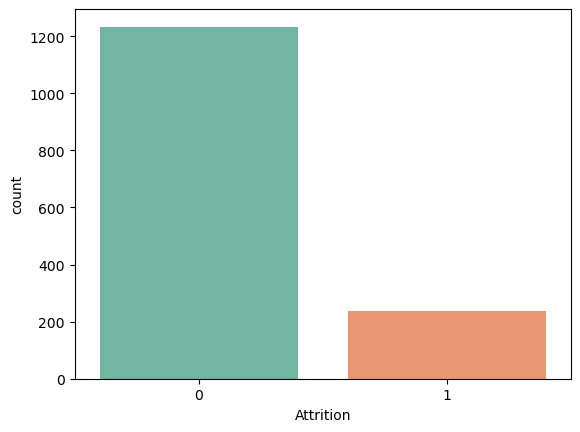

In [11]:
y = df['Attrition']

sns.countplot(x=y, palette='Set2')

target_temp = df['Attrition'].value_counts()
print(target_temp)

In [12]:
print(f"Percentage of Employees who's still working: {str(round(target_temp[0]*100/1470, 2))}")
print(f"Percentage of Employees who's left company: {str(round(target_temp[1]*100/1470, 2))}")

Percentage of Employees who's still working: 83.88
Percentage of Employees who's left company: 16.12


Now check the relation of all feature with our target feature

In [13]:
x = df.columns
for i in x:
    print(i)

Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
category_Human Resources
category_Life Sciences
category_Marketing
category_Medical
category_Other
category_Technical Degree
category_Healthcare Representative
category_Human Resources.1
category_Laboratory Technician
category_Manager
category_Manufacturing Director
category_Research Director
category_Research Scientist
category_Sales Executive
category_Sales Representative


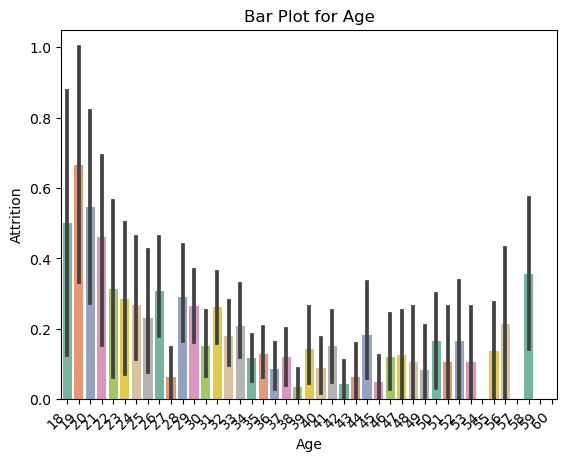

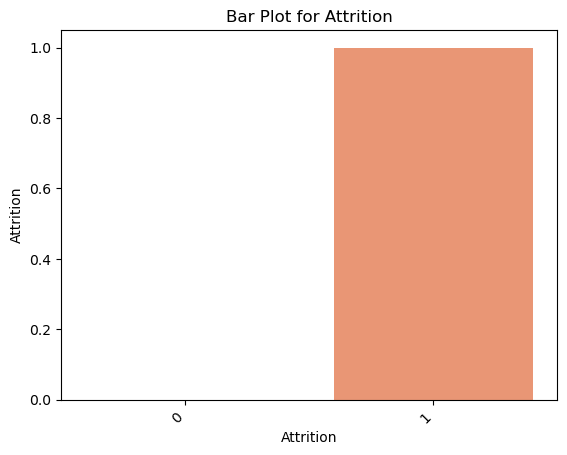

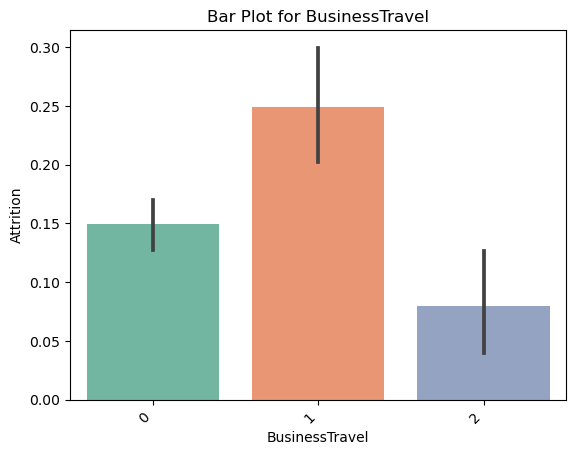

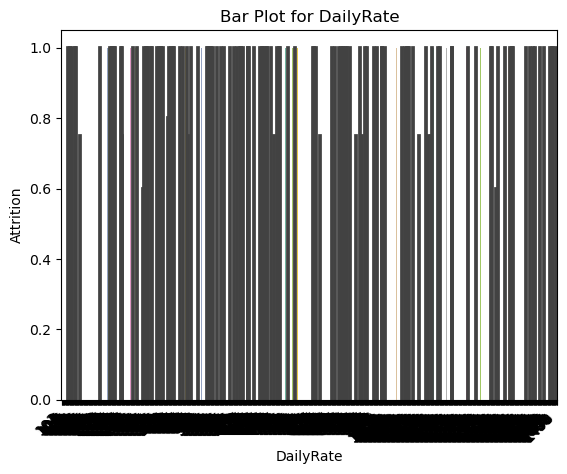

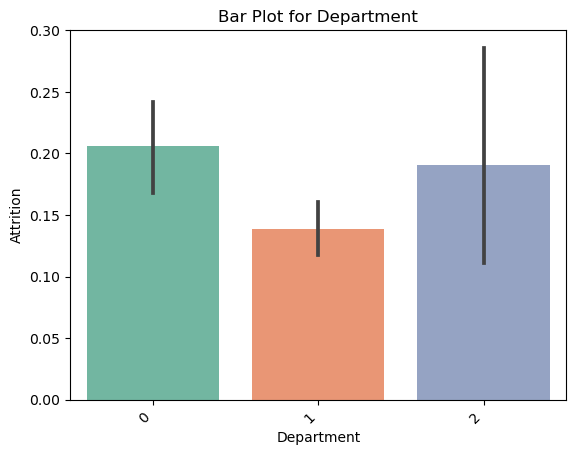

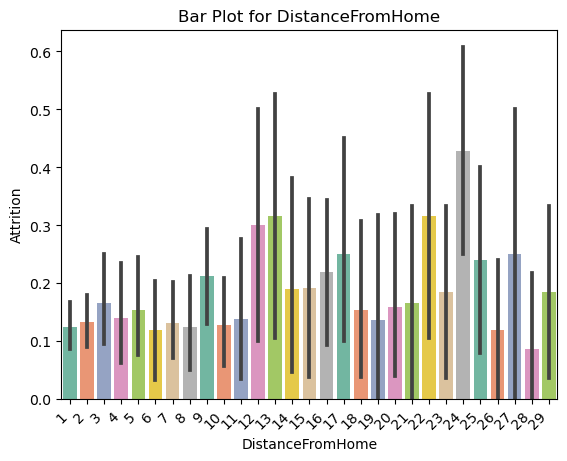

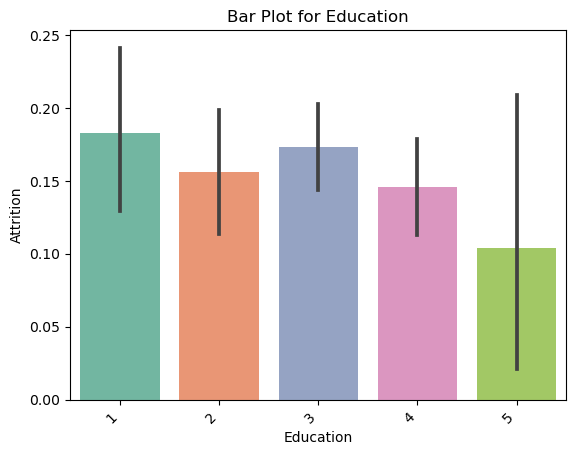

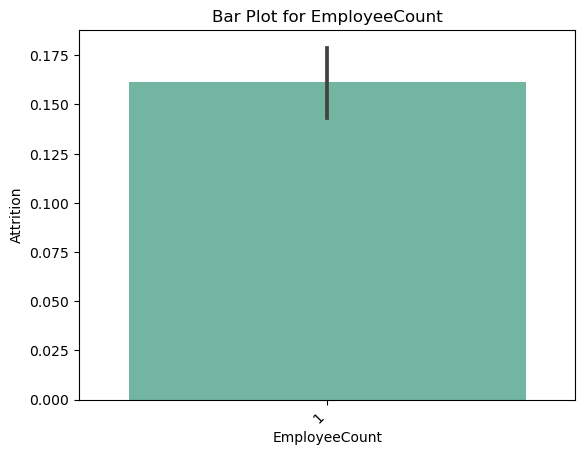

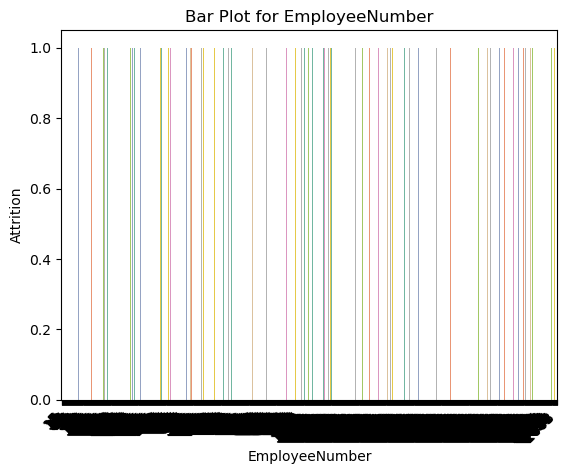

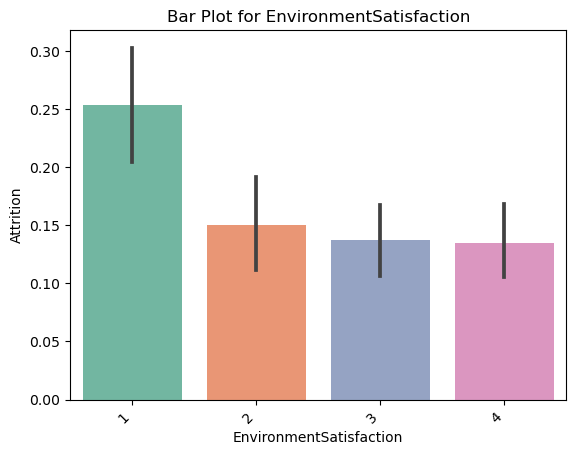

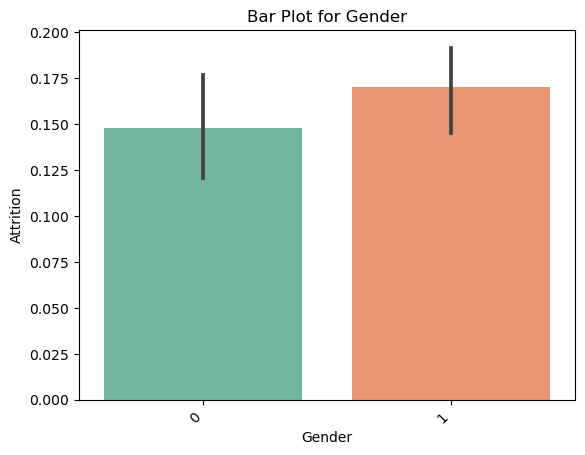

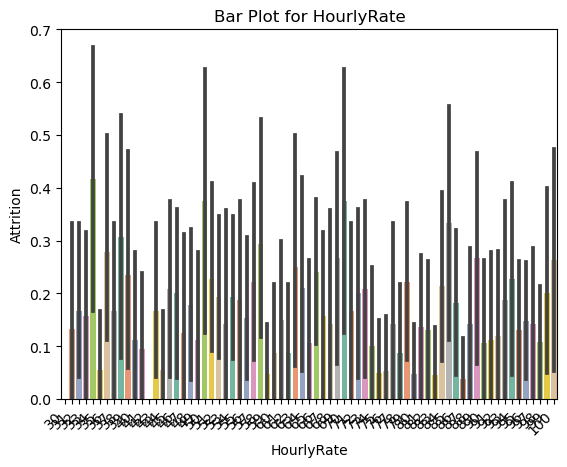

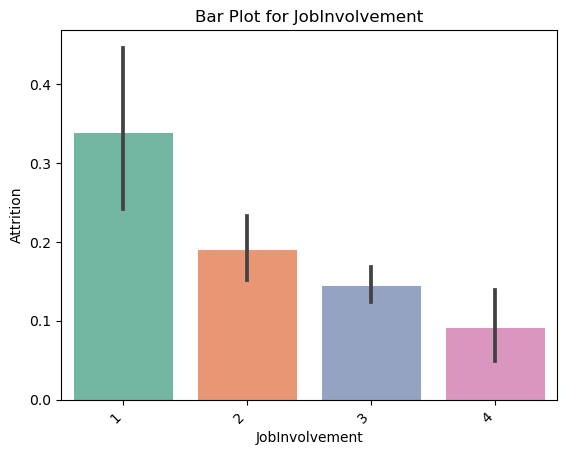

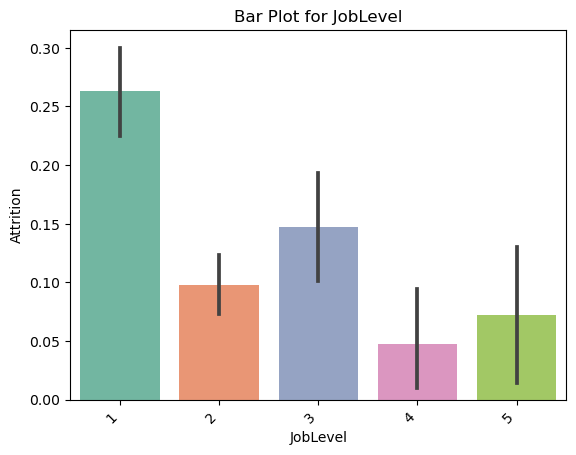

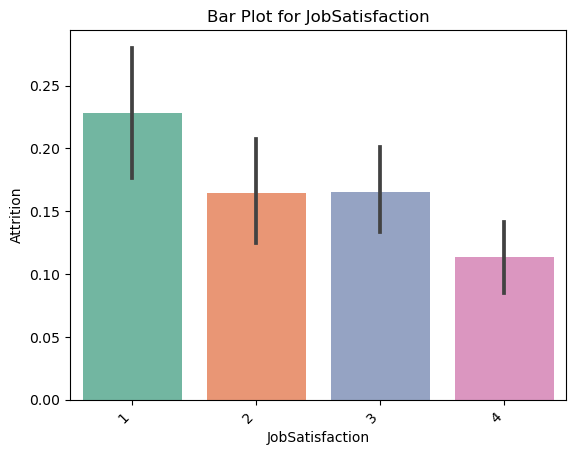

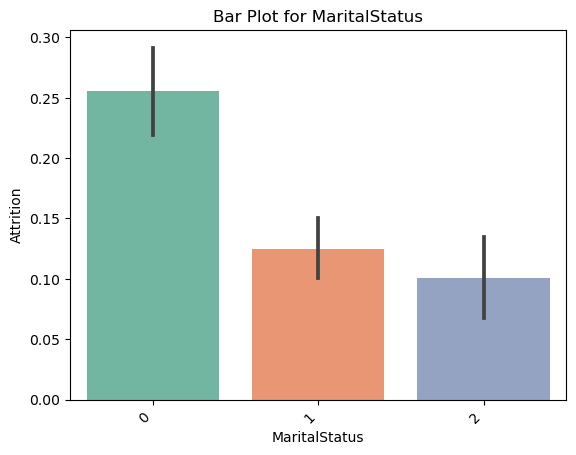

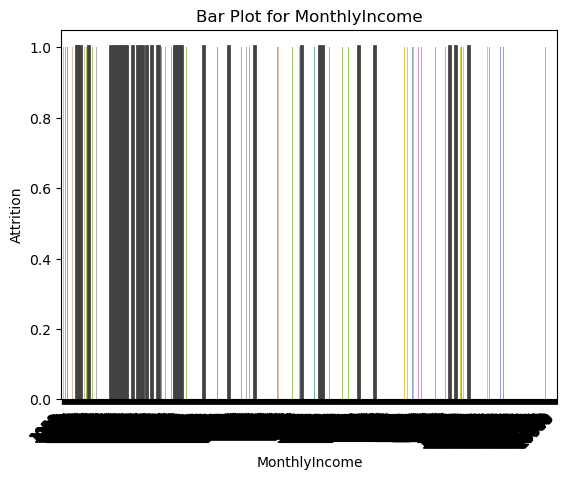

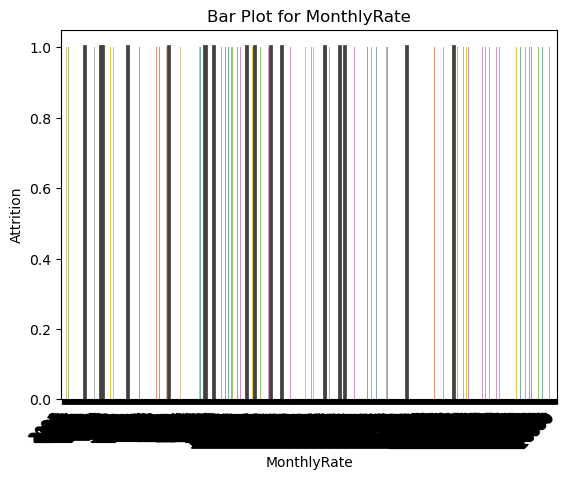

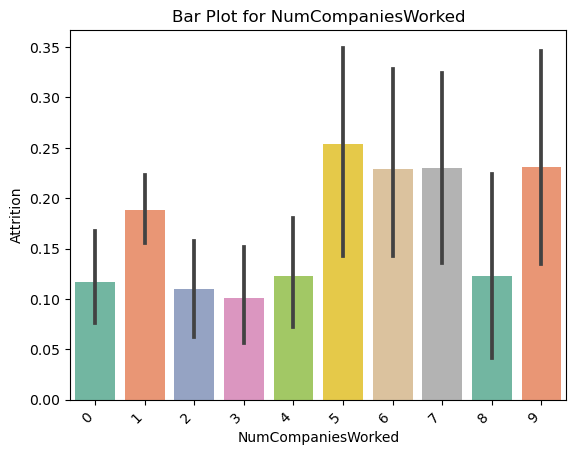

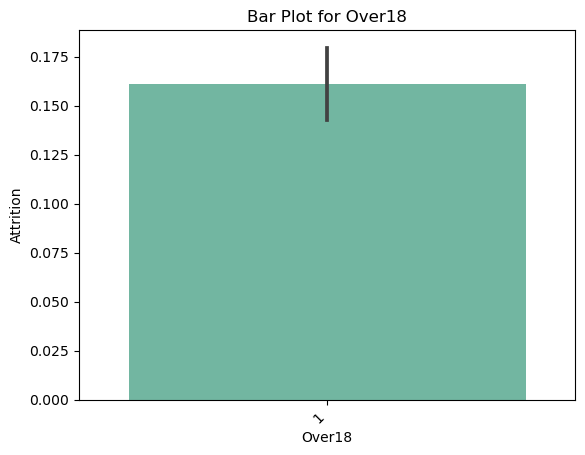

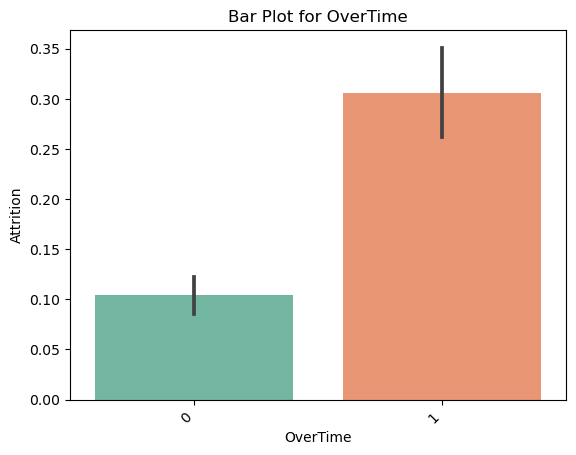

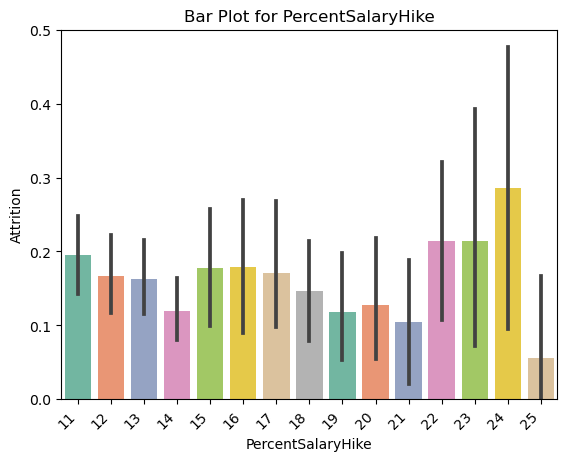

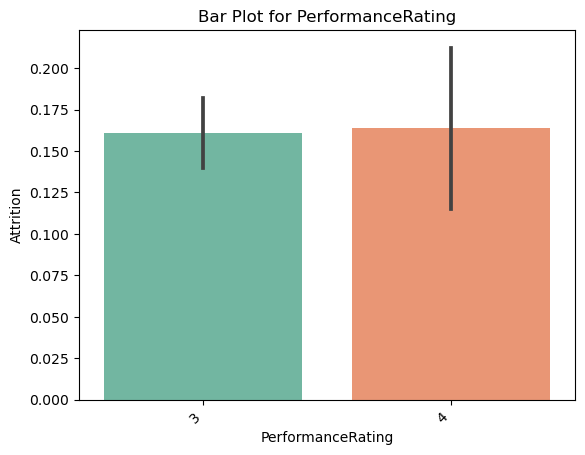

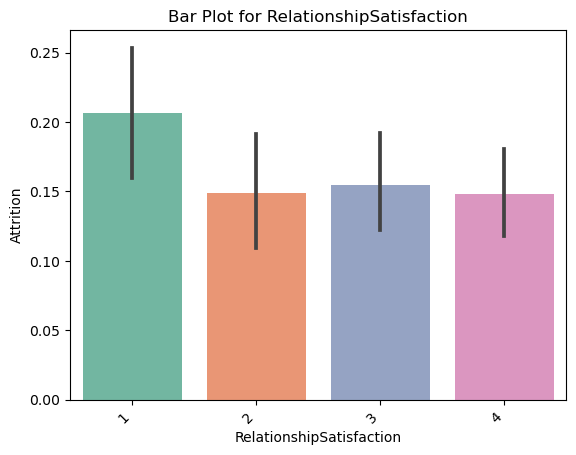

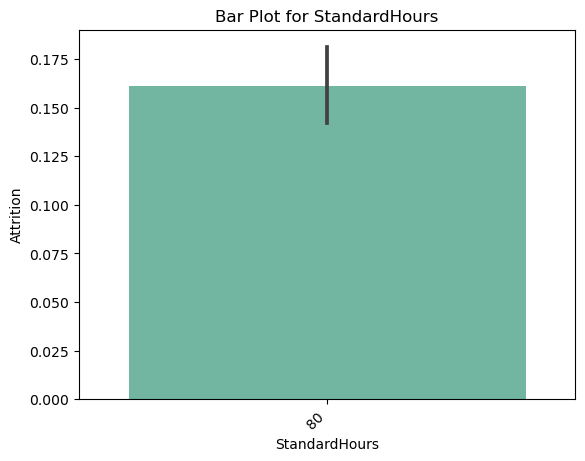

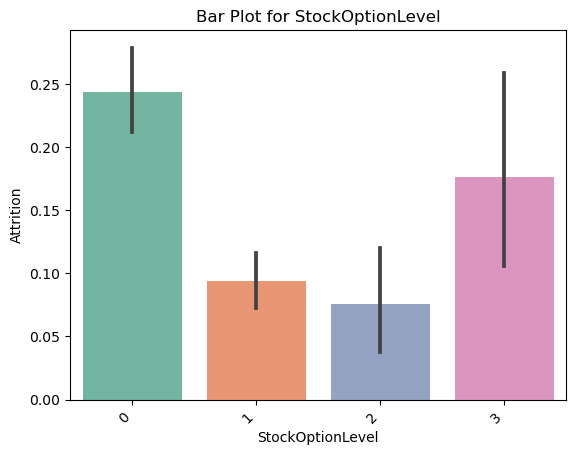

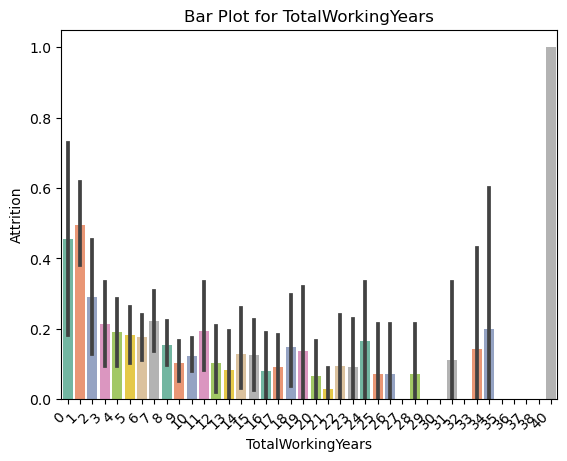

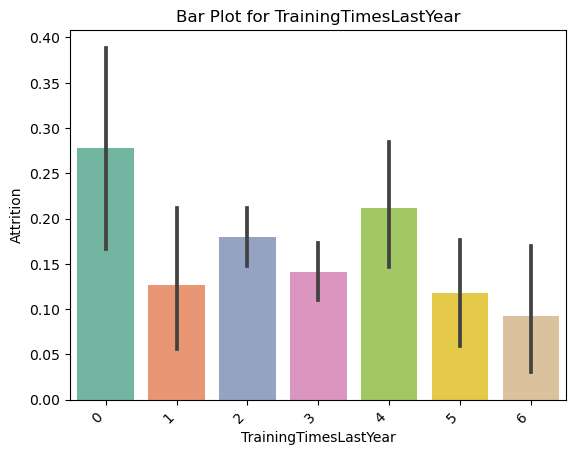

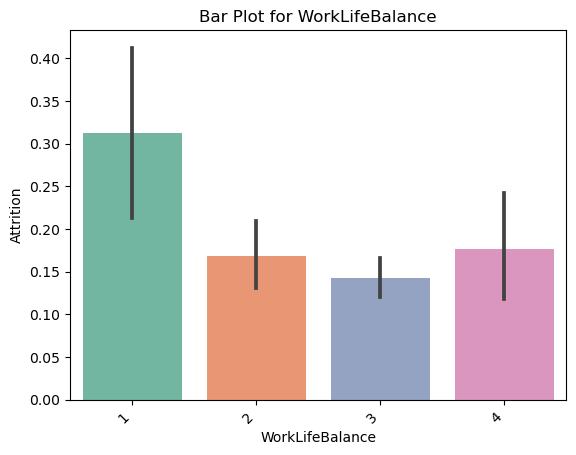

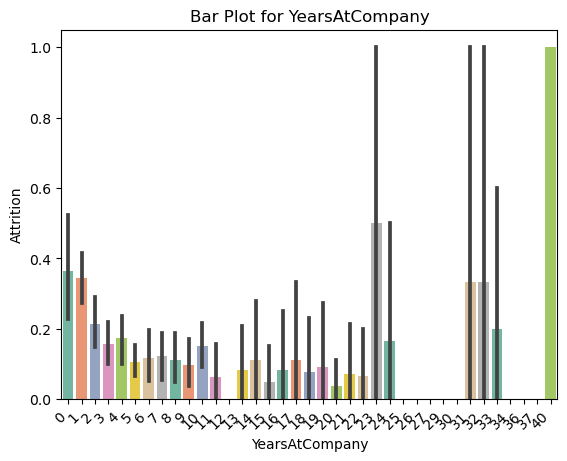

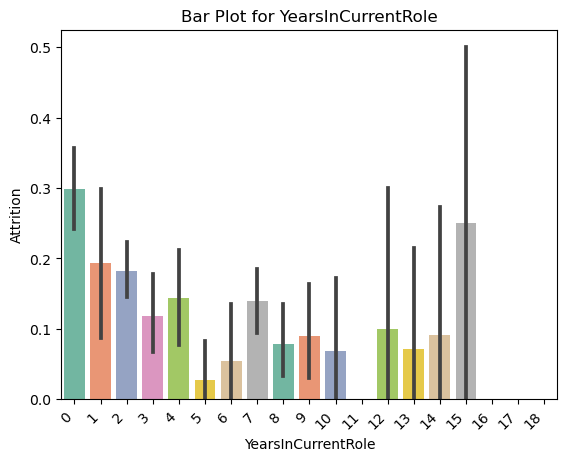

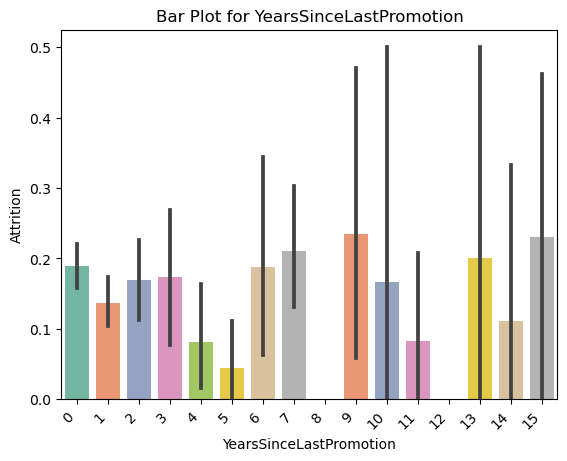

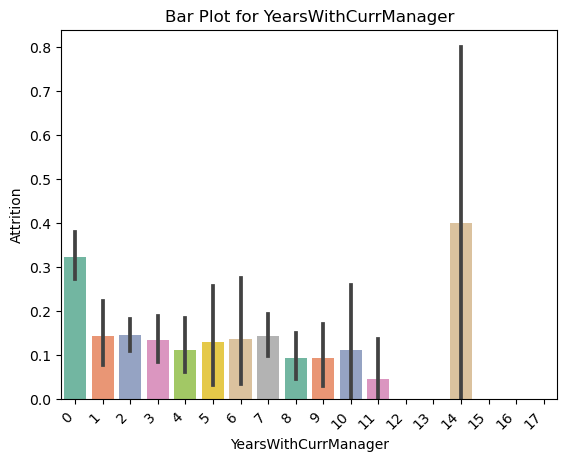

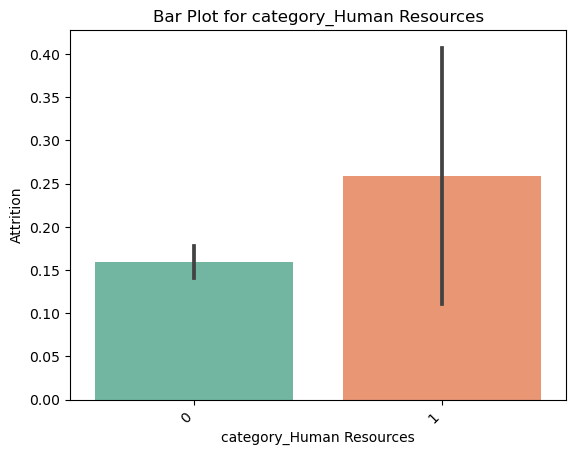

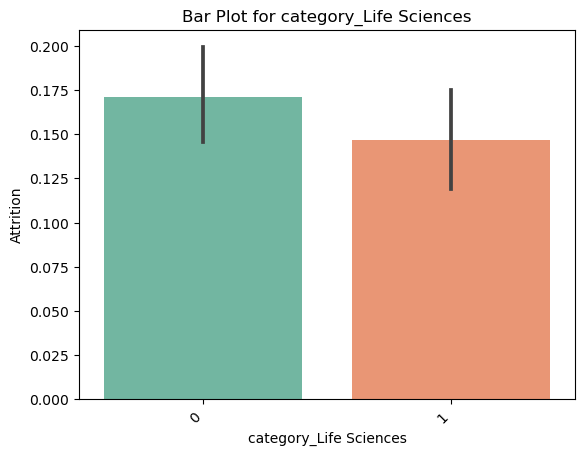

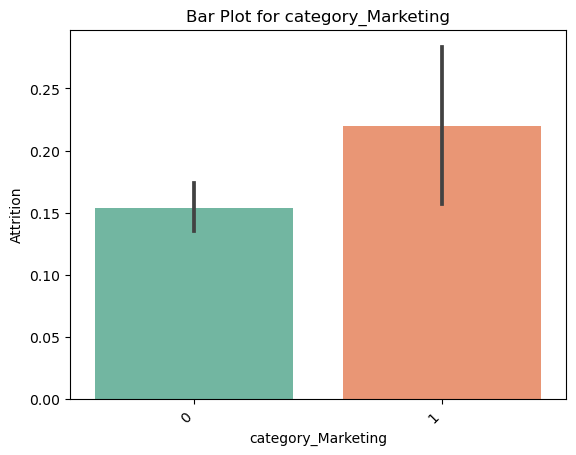

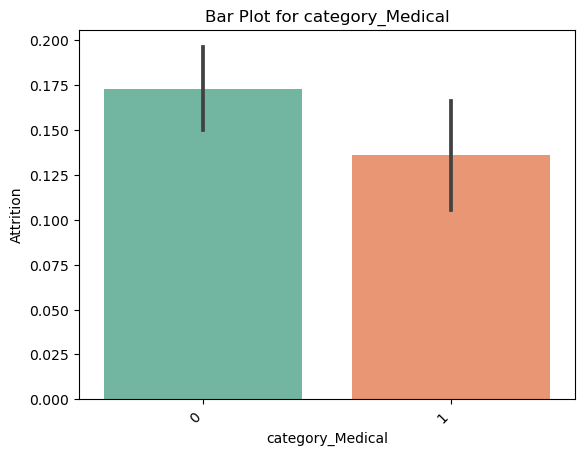

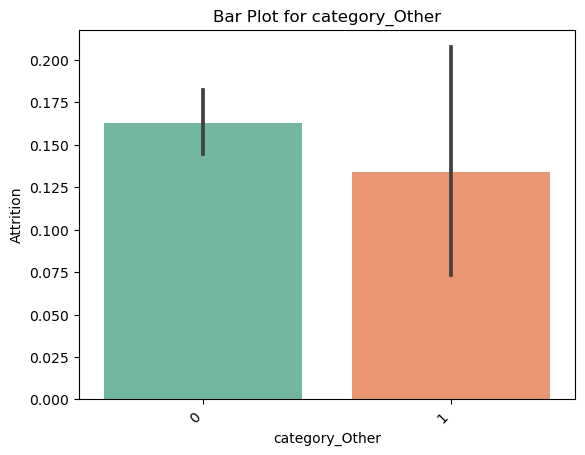

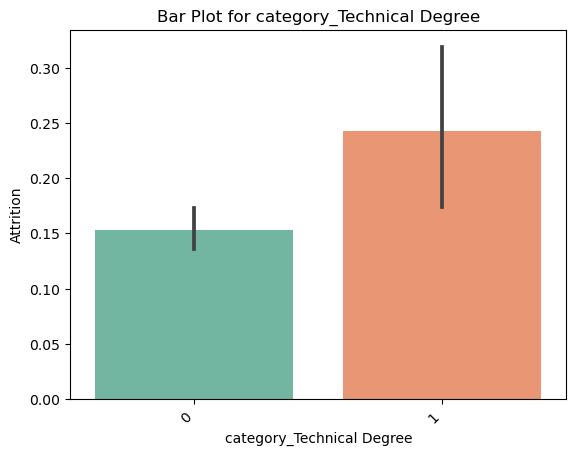

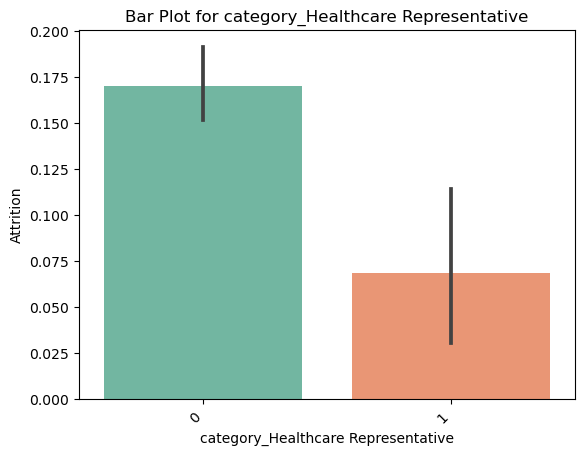

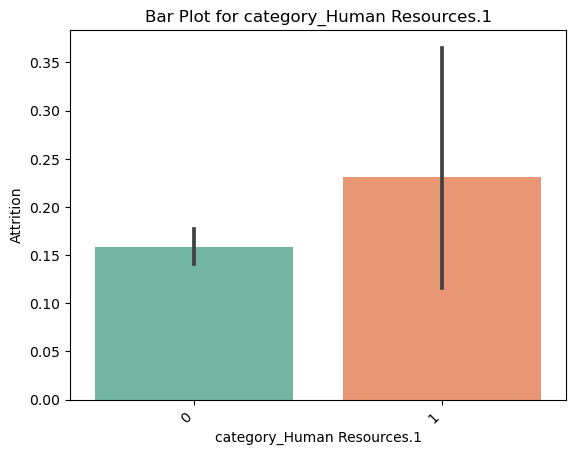

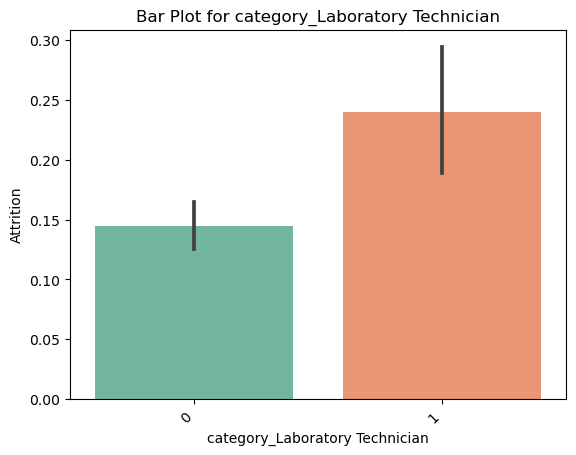

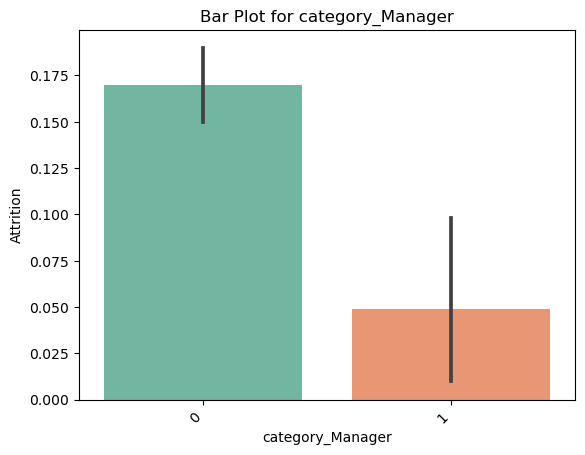

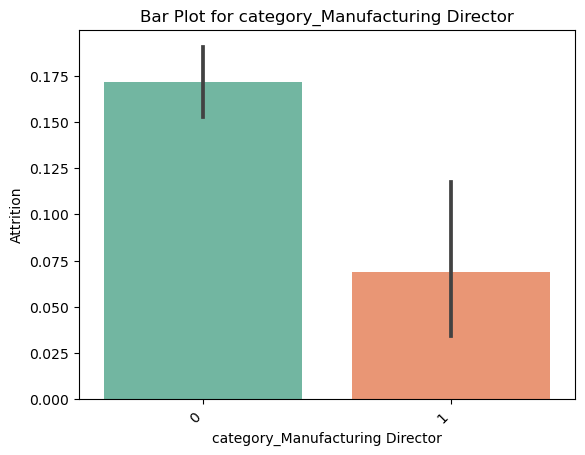

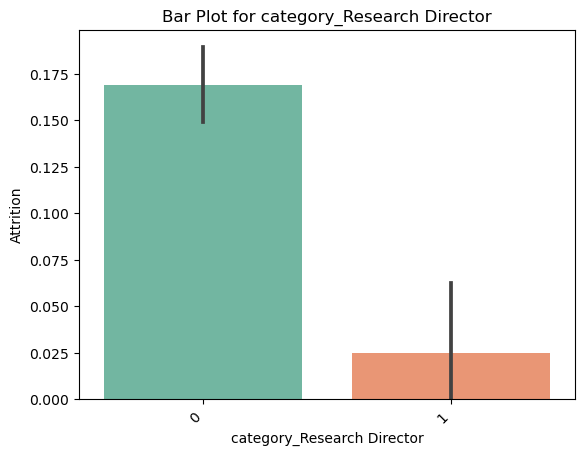

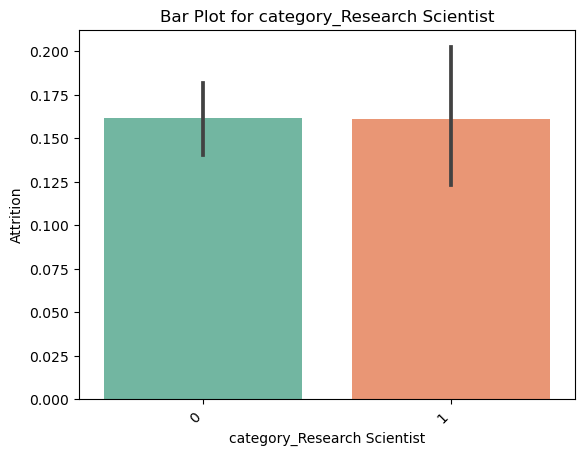

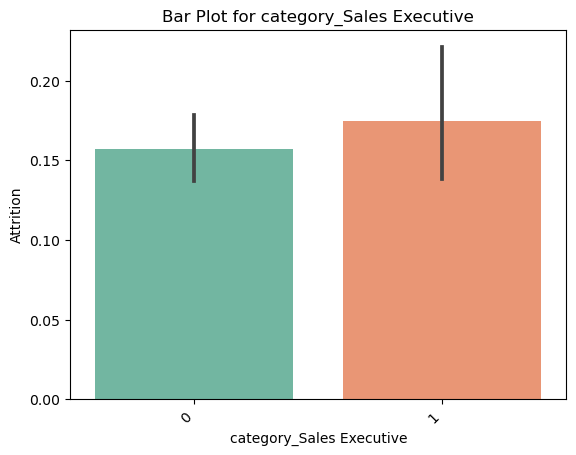

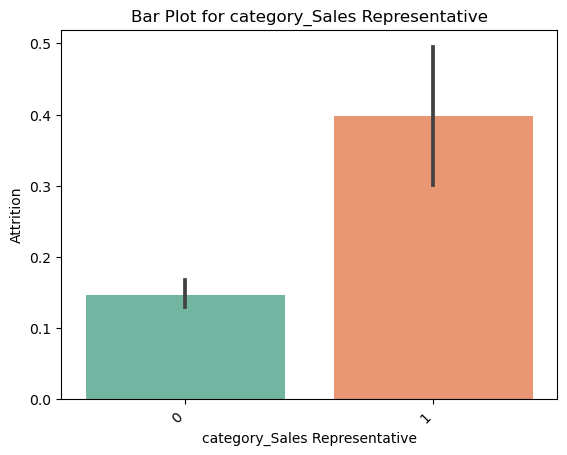

In [14]:
def graph_emp(df, y):
    for column in df.columns:
        sns.barplot(x=column, y=y, data=df, palette='Set2')
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Attrition')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.show()

# Assuming 'df' is your DataFrame containing the data
# Assuming 'y' is the column you want to use for the y-axis
graph_emp(df, y)

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(1176, 47)

In [18]:
X_test.shape

(294, 47)

In [19]:
y_train.shape

(1176,)

In [20]:
y_test.shape

(294,)

### Model Fitting

In [21]:
from sklearn.metrics import accuracy_score, classification_report

#### Logistic Regression

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Initialize logistic regression classifier
lr = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV with logistic regression classifier and hyperparameters grid
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator to make predictions on the test data
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


In [62]:
score_lr = round(accuracy_score(y_test, y_pred_lr)*100, 2)
print(f'The accuracy score achieved using Logistic Regression is: {str(score_lr)} %')

report = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(report)

The accuracy score achieved using Logistic Regression is: 86.39 %
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.67      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.78      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294



#### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


max_accuracy = 0
best_x = None

for x in range(300):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = accuracy_score(y_pred_dt, y_test)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x
        
# Hyperparameter Tuning and Cross-Validation: Decision Tree Classifier
param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=best_x), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)


In [24]:
score_dt = round(accuracy_score(y_test, y_pred_best_dt)*100, 2)
print(f'The accuracy score achieved using Decision Tree Classifier with hyperparameter tuning is: {str(score_dt)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_best_dt))

The accuracy score achieved using Decision Tree Classifier with hyperparameter tuning is: 79.93 %
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       245
           1       0.39      0.37      0.38        49

    accuracy                           0.80       294
   macro avg       0.63      0.63      0.63       294
weighted avg       0.79      0.80      0.80       294



#### Random Forest

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

# Hyperparameter Tuning and Cross-Validation: Random Forest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

In [46]:
score_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print(f'The accuracy score achieved using Random Forest with hyperparameter tuning is: {str(score_rf)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

The accuracy score achieved using Random Forest with hyperparameter tuning is: 85.03 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       245
           1       0.78      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.82      0.57      0.58       294
weighted avg       0.84      0.85      0.80       294



#### Gradient Boosting (e.g., XGBoost or LightGBM)

In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_model = xgb.XGBClassifier()

# Hyperparameter Tuning and Cross-Validation: XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred_xgb = best_model.predict(X_test)

In [47]:
score_xgb = round(accuracy_score(y_test, y_pred_xgb)*100, 2)
print(f'The accuracy score achieved using XGBoost with hyperparameter tuning is: {str(score_xgb)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

The accuracy score achieved using XGBoost with hyperparameter tuning is: 86.05 %
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.72      0.27      0.39        49

    accuracy                           0.86       294
   macro avg       0.80      0.62      0.65       294
weighted avg       0.85      0.86      0.83       294



In [29]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()

# Hyperparameter Tuning and Cross-Validation: LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred_lgb = best_model.predict(X_test)

[LightGBM] [Info] Number of positive: 150, number of negative: 790
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159574 -> initscore=-1.661398
[LightGBM] [Info] Start training from score -1.661398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [48]:
score_lgb = round(accuracy_score(y_test, y_pred_lgb)*100, 2)
print(f'The accuracy score achieved using LightGBM with hyperparameter tuning is: {str(score_lgb)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

The accuracy score achieved using LightGBM with hyperparameter tuning is: 84.01 %
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       245
           1       0.54      0.29      0.37        49

    accuracy                           0.84       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.81      0.84      0.82       294



#### Support Vector Machine (SVM)

In [31]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [49]:
score_svm = round(accuracy_score(y_test, y_pred_svm)*100, 2)
print(f'The accuracy score achieved using Support Vector Machine with hyperparameter tuning is: {str(score_svm)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

The accuracy score achieved using Support Vector Machine with hyperparameter tuning is: 85.71 %
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.77      0.20      0.32        49

    accuracy                           0.86       294
   macro avg       0.82      0.60      0.62       294
weighted avg       0.85      0.86      0.82       294



#### Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [41]:
model = Sequential()
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

In [42]:
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0867 - mae: 1.0867  
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7352 - mae: 0.7352
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5069 - mae: 0.5069
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3811 - mae: 0.3811 
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3052 - mae: 0.3052 
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2668 - mae: 0.2668 
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2357 - mae: 0.2357 
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1994 - mae: 0.1994 
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1949 - mae: 0.1949
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1993 - mae: 0.1993 
Epoch 11/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2143 - mae: 0.2143
Epoch 12/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1829 - mae: 0.1829
Epoch 13/300
37/37 ━━━━━━━━━━

In [43]:
y_pred_nn = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [44]:
rounded = [round(x[0]) for x in y_pred_nn]
y_pred_nn = rounded

In [50]:
score_nn = round(accuracy_score(y_test, y_pred_nn)*100, 2)
print(f'The accuracy score achieved using Neural Network: {str(score_nn)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_nn))

The accuracy score achieved using Neural Network: 83.33 %
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       245
           1       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294



#### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb = GaussianNB()

# Hyperparameter Tuning and Cross-Validation: Naive Bayes
param_grid = {
    'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.5, 0.5]]
}

grid_search_nb = GridSearchCV(nb, param_grid, cv=5)
grid_search_nb.fit(X_train, y_train)

best_nb = grid_search_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

In [57]:
score_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
print(f'The accuracy score achieved using Naive Bayes with hyperparameter tuning is: {str(score_nb)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

The accuracy score achieved using Naive Bayes with hyperparameter tuning is: 65.31 %
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.65      0.76       245
           1       0.27      0.65      0.39        49

    accuracy                           0.65       294
   macro avg       0.59      0.65      0.57       294
weighted avg       0.80      0.65      0.70       294



#### K-Nearest Neighbors (KNN)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline with feature scaling and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter Tuning and Cross-Validation: KNN
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  
    'knn__weights': ['uniform', 'distance'],  
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
}


grid_search_knn = GridSearchCV(pipeline, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

In [54]:
score_knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
print(f'The accuracy score achieved using K-Nearest Neightbors with hyperparameter tuning is: {str(score_knn)} %')

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

The accuracy score achieved using K-Nearest Neightbors with hyperparameter tuning is: 84.01 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.60      0.12      0.20        49

    accuracy                           0.84       294
   macro avg       0.72      0.55      0.56       294
weighted avg       0.81      0.84      0.79       294



In [64]:
scores = [score_lr, score_dt, score_rf, score_xgb, score_lgb, score_svm, score_nn, score_nb, score_knn]
algorithm = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVM', 'Neural Network', 'Naive Bayes', 'K-Nearest Neighbors']

for i in range(len(algorithm)):
    print(f"The accuracy of score achieved using {algorithm[i]} is {str(scores[i])} %")

The accuracy of score achieved using Logistic Regression is 86.39 %
The accuracy of score achieved using Decision Tree is 79.93 %
The accuracy of score achieved using Random Forest is 85.03 %
The accuracy of score achieved using XGBoost is 86.05 %
The accuracy of score achieved using LightGBM is 84.01 %
The accuracy of score achieved using SVM is 85.71 %
The accuracy of score achieved using Neural Network is 83.33 %
The accuracy of score achieved using Naive Bayes is 65.31 %
The accuracy of score achieved using K-Nearest Neighbors is 84.01 %


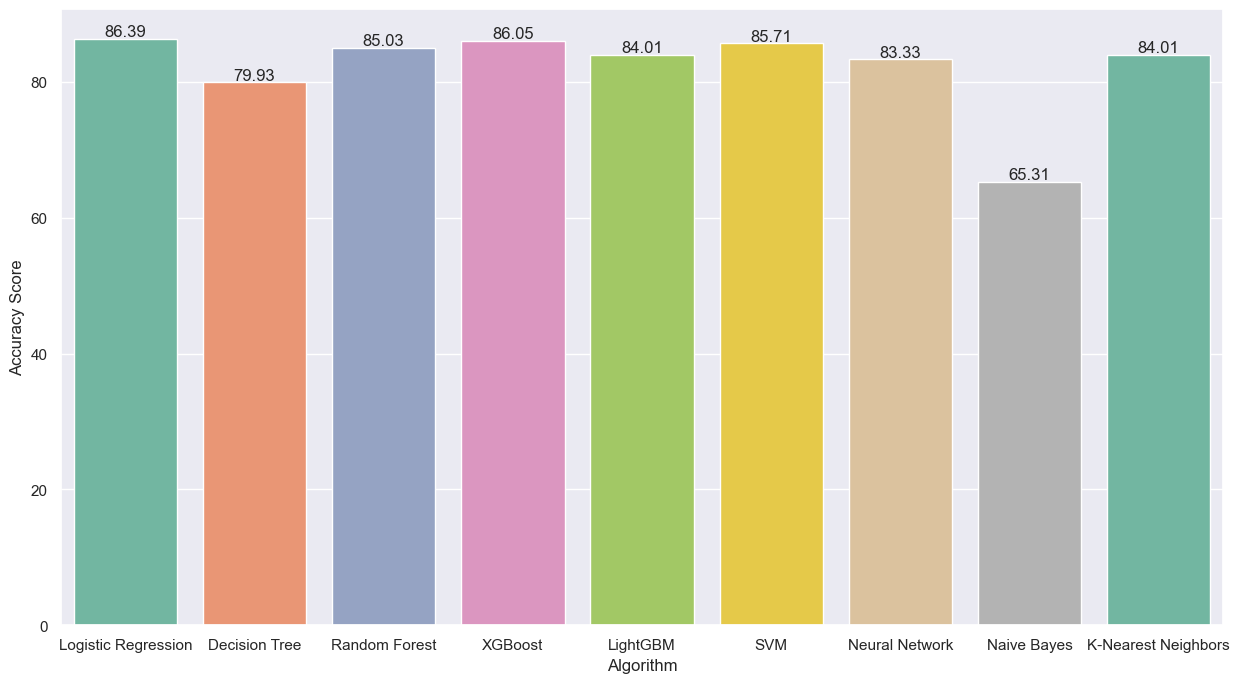

In [66]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithm")
plt.ylabel("Accuracy Score")

# Create the bar plot
barplot = sns.barplot(x=algorithm, y=scores, palette='Set2')

# Add annotations to the bars
for bar, score in zip(barplot.patches, scores):
    barplot.annotate(format(score, '.2f'), 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.show()